<a href="https://colab.research.google.com/github/utsav-sharma2020/mylab/blob/master/NTCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import  Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go
from google.colab import files
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sales_df = pd.read_csv('/content/drive/My Drive/AIinMarketingDataset/sales_data_sample.csv', encoding = 'unicode_escape')

In [4]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [5]:
sales_df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [6]:
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])

In [7]:
sales_df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [8]:
df_drop = ['ADDRESSLINE1' , 'ADDRESSLINE2' , 'POSTALCODE','CITY', 'STATE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'TERRITORY','PHONE', 'CUSTOMERNAME', 'ORDERNUMBER'  ]
sales_df = sales_df.drop(df_drop, axis=1)
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [9]:
sales_df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [10]:
 sales_df.nunique()


QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

DATA CLEANING AND DATA analysis

In [11]:
sales_df['COUNTRY'].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object')

In [12]:
sales_df['COUNTRY'].value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

In [13]:
def bar_visual(y):
  fi= plt.Figure(figsize= (12,6))
  fi= px.bar (x= sales_df[y].value_counts().index , y= sales_df[y].value_counts() , color = sales_df[y].value_counts().index , height =600)
  fi.show()

In [14]:
bar_visual('COUNTRY')

In [15]:
bar_visual('STATUS') #to check how imbalanced the data is and since the order status  is highly imbalanced, we can drop it as well

In [16]:
sales_df.drop(columns = ['STATUS'], inplace= True) #inplace =1 will entirely delete it from the memory
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,S72_3212,France,Small


In [17]:
bar_visual('PRODUCTLINE')

In [18]:
bar_visual('DEALSIZE')

In [19]:
# Function to add dummy variables to replace categorical variables
#ONE-HOT ENCODING

def dummy(y):
  dummy = pd.get_dummies(sales_df[y])
  sales_df.drop(columns = y , inplace = True)
  return pd.concat([sales_df, dummy], axis = 1)

In [20]:
sales_df = dummy('COUNTRY')
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,DEALSIZE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,Small,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,Small,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,Medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,Medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,Medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,S72_3212,Small,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,S72_3212,Medium,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,S72_3212,Medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,S72_3212,Small,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
sales_df = dummy('DEALSIZE')

In [22]:
sales_df = dummy('PRODUCTLINE')

In [23]:
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [24]:
y = pd.Categorical(sales_df['PRODUCTCODE'])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [25]:
y = pd.Categorical(sales_df['PRODUCTCODE']).codes
y

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [26]:
sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes

In [27]:
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,108,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,108,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [28]:
# Group data by order date
sales_df_group = sales_df.groupby(by = "ORDERDATE").sum()
sales_df_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
ORDERDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,2,0,0,0,0,0,0,4
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181.0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,4
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,2
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723.0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,10,6,3,0,0,0,0,7,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,8,5,7,0,0,0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,2,3,1,0,6,0,0,0,0,0
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462.0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,4,14,0,0,0,0,0,0
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,8,7,7,0,0,0,0,0,8


In [29]:
fi= px.line(x = sales_df_group.index, y = sales_df_group.SALES, title='sales')
fi.show()

In [30]:
#dropping 'ORDERDATE' since we have other date-related data such as 'MONTH'
sales_df.drop("ORDERDATE", axis = 1, inplace = True)
sales_df.shape

(2823, 38)

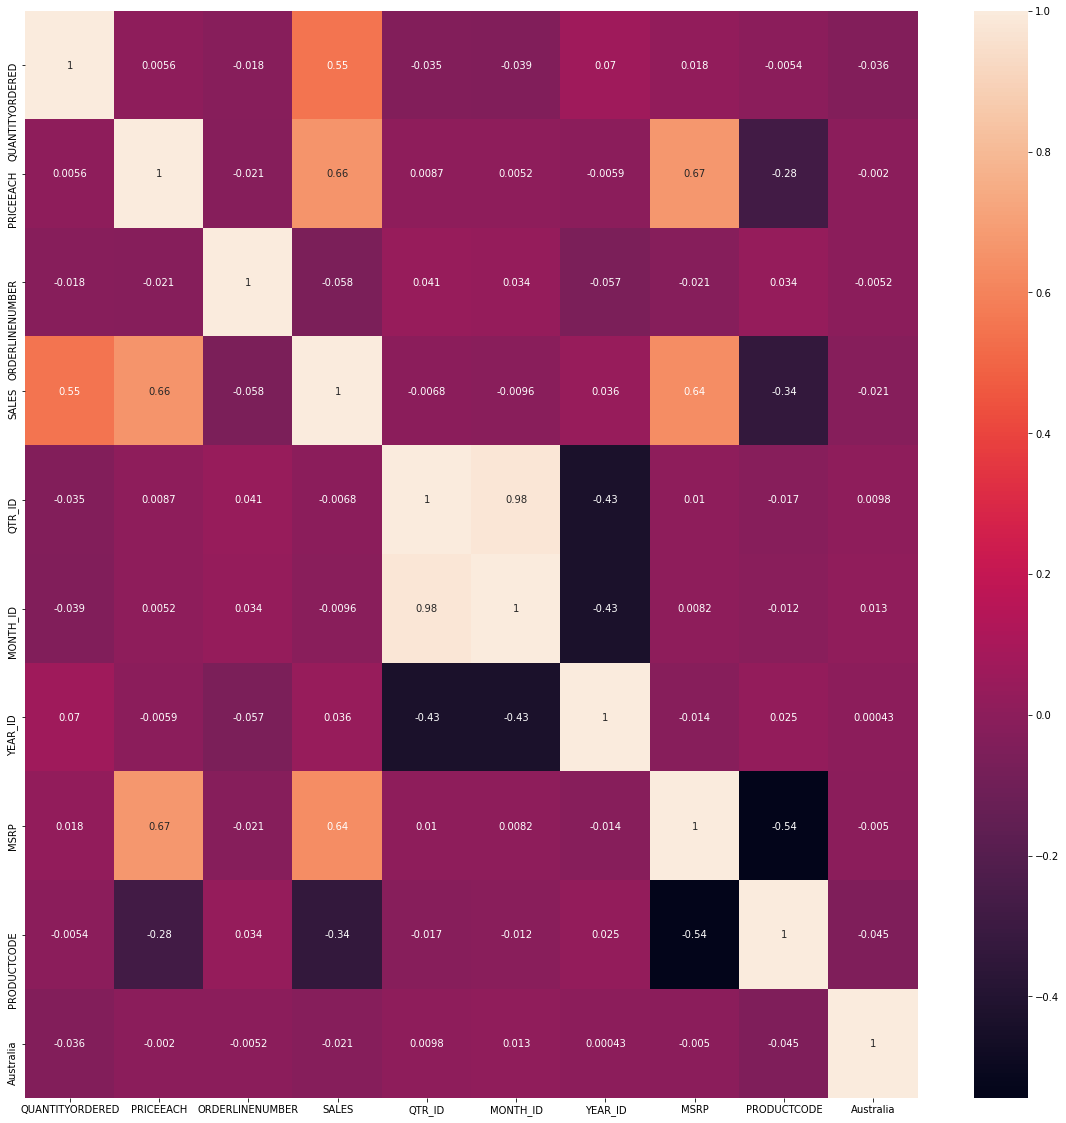

In [31]:
#Making a corelation matrix using heat map
plt.figure(figsize=(20,20))
corr_mat= sales_df.iloc[:,:10].corr()
sns.heatmap(corr_mat, annot= True)

In [32]:
sales_df.drop('QTR_ID', axis=1, inplace= True)
sales_df.shape

(2823, 37)

In [33]:
#making distplot using plotly
#distplots shows: histogram, kde plot(kernel density estimate function: probability density of continuous data), rug plot(like 1-d scatter plot)

import plotly.figure_factory as tt

plt.figure(figsize = (10, 10))

for i in range(8):
  if sales_df.columns[i] != 'ORDERLINENUMBER':
    fig = tt.create_distplot([sales_df[sales_df.columns[i]].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text = sales_df.columns[i])
    fig.show()

<Figure size 720x720 with 0 Axes>

In [34]:
#seaborn library pair plot
# Visualizing the relationship between variables using pairplots
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(sales_df,
    dimensions = sales_df.columns[:8], color = 'MONTH_ID')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

<Figure size 1080x1080 with 0 Axes>

Possible conclusions from above graph:

1. A trend exists between 'SALES' and 'QUANTITYORDERED'
2. A trend exists between 'MSRP' and 'PRICEEACH'  
3. A trend exists between 'PRICEEACH' and 'SALES'
4. It seems that sales growth exists as we move from 2013 to 2014 to 2015 ('SALES' vs. 'YEAR_ID')
5. zoom in into 'SALES' and 'QUANTITYORDERED', you will be able to see the monthly information color coded on the graph


TRAINING THE DATA

In [35]:
#scaling the data using sklearn

scaler =StandardScaler()
sales_df_scaled =scaler.fit_transform(sales_df)


In [36]:
sales_df_scaled.shape

(2823, 37)

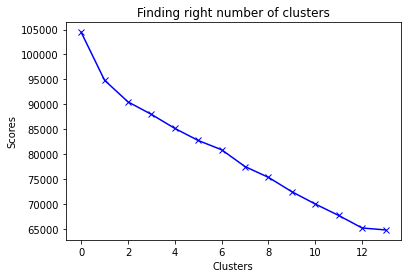

In [37]:
sc = []

value= range(1,15)

for i in value:
  km= KMeans(n_clusters= i)
  km.fit(sales_df_scaled)  
  sc.append(km.inertia_) # intertia is WSCC: the Sum of squared distances of samples to their closest cluster center

plt.plot(sc, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()


Apply KMeans method with number of clusters=5

In [44]:
kmeans= KMeans(5)
kmeans.fit(sales_df_scaled)
labels=kmeans.labels_

In [45]:
labels

array([0, 0, 2, ..., 1, 1, 1], dtype=int32)

In [46]:
kmeans.cluster_centers_.shape

(5, 37)

In [47]:
# cluster centers 
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,-0.459770,-0.771173,0.045788,-0.823528,0.011999,0.001562,-0.590374,0.185171,0.058603,-0.140961,-0.026930,0.004562,-0.043907,-0.000268,0.021070,0.012174,0.018227,0.060516,0.039613,0.019378,0.004863,0.022300,-0.015485,-0.018493,-0.029417,-0.003989,-0.019060,-0.242672,-0.980703,1.096370,-0.100953,0.059283,0.115299,-0.300637,0.102522,-0.012059,0.153114
1,-0.025599,0.011785,0.063575,-0.264387,-0.030046,0.021935,-0.359741,1.130080,-0.229680,-0.140961,0.336199,0.231977,0.261001,0.036838,-0.063371,-0.090521,-0.075499,-0.071120,0.024683,-0.176195,-0.096414,-0.064229,0.148384,0.165562,-0.105371,0.222666,-0.107168,-0.242672,-0.050092,0.161995,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.345470,-0.523371
2,0.269941,0.596065,-0.013803,0.480424,0.008025,-0.020884,0.424065,-0.260636,0.010409,-0.140961,-0.019299,-0.025485,-0.015467,0.001482,-0.002075,0.008698,-0.011456,-0.036606,-0.035685,0.020739,0.021019,0.000367,0.006895,-0.001132,0.063782,-0.013329,0.053812,-0.242672,1.019676,-0.912100,0.142686,0.019104,-0.021335,-0.300637,-0.039553,0.101079,-0.022126
3,1.223882,0.799961,-0.268121,2.575220,-0.096798,0.114838,1.449091,-0.874499,-0.079937,-0.140961,-0.108756,-0.117427,0.114406,0.000509,0.082775,0.028530,0.098629,0.029197,0.008833,0.015039,-0.027994,-0.011160,-0.030759,-0.050616,-0.105371,-0.113017,0.130874,4.120788,-0.980703,-0.912100,0.586589,-0.019085,-0.159457,-0.300637,-0.127328,-0.197232,-0.141557
4,0.081943,0.142367,-0.153367,0.065149,-0.035235,0.030410,0.055497,-0.206998,-0.264819,7.094172,-0.108756,-0.159458,-0.151083,-0.183541,-0.353765,-0.149852,-0.075499,-0.204199,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934,0.074670,0.074042,-0.108712,0.236012,-0.081879,0.002237,-0.036861,-0.167454,-0.050918,-0.080814


In [48]:
# In order to understand what these numbers mean, we perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30.614776,68.103439,6.659631,2037.329525,7.136324,2003.816183,76.993843,59.620932,8.003518e-02,3.018419e-16,8.795075e-03,2.550572e-02,1.583113e-02,3.254178e-02,1.178540e-01,2.374670e-02,7.036060e-03,5.189094e-02,2.374670e-02,3.342128e-02,9.674582e-03,0.031662,1.160950e-01,1.759015e-02,7.915567e-03,5.013193e-02,3.465259e-01,4.857226e-16,-1.054712e-15,1.000000e+00,2.946350e-01,1.363237e-01,1.442392e-01,-5.134781e-16,4.397537e-02,0.102902,2.779244e-01
1,34.843478,83.896261,6.734783,3067.010435,6.982609,2003.830435,86.260870,89.460870,8.695652e-03,-6.245005e-17,4.782609e-02,6.086957e-02,6.086957e-02,3.913043e-02,9.130435e-02,8.695652e-03,-1.908196e-17,2.608696e-02,2.173913e-02,1.075529e-16,3.469447e-17,0.017391,1.695652e-01,4.347826e-02,5.724587e-17,1.000000e-01,3.043478e-01,-1.942890e-16,4.652174e-01,5.347826e-01,2.220446e-16,-4.440892e-16,1.387779e-17,1.000000e+00,-1.283695e-16,0.000000,5.551115e-16
2,37.721955,95.681595,6.407853,4438.608229,7.121795,2003.800481,117.754808,45.542468,6.810897e-02,3.087808e-16,9.615385e-03,2.083333e-02,2.003205e-02,3.285256e-02,1.105769e-01,2.323718e-02,4.807692e-03,3.285256e-02,1.362179e-02,3.365385e-02,1.121795e-02,0.028045,1.233974e-01,2.003205e-02,1.762821e-02,4.807692e-02,3.814103e-01,-1.387779e-17,1.000000e+00,-7.771561e-15,4.102564e-01,1.233974e-01,1.017628e-01,-1.013079e-15,2.083333e-02,0.137821,2.059295e-01
3,47.013072,99.794314,5.333333,8296.256078,6.738562,2003.895425,158.941176,26.156863,4.575163e-02,-5.551115e-17,-2.428613e-17,6.535948e-03,3.921569e-02,3.267974e-02,1.372549e-01,2.614379e-02,1.307190e-02,4.575163e-02,1.960784e-02,3.267974e-02,6.535948e-03,0.026144,1.111111e-01,1.307190e-02,4.163336e-17,2.614379e-02,4.183007e-01,1.000000e+00,-7.771561e-16,1.165734e-15,6.209150e-01,1.111111e-01,5.882353e-02,-9.714451e-17,6.535948e-03,0.045752,1.568627e-01
4,35.890909,86.530182,5.818182,3673.864182,6.963636,2003.836364,102.945455,47.236364,1.387779e-17,1.000000e+00,5.204170e-18,3.469447e-18,1.387779e-17,6.938894e-18,8.326673e-17,3.469447e-17,-1.734723e-18,-6.938894e-18,-2.081668e-17,1.734723e-17,-6.938894e-18,0.000000,-2.775558e-17,2.081668e-17,-3.469447e-18,2.775558e-17,-1.110223e-16,7.272727e-02,5.272727e-01,4.000000e-01,4.545455e-01,9.090909e-02,1.090909e-01,7.272727e-02,1.734723e-17,0.090909,1.818182e-01


In [49]:
labels.shape

(2823,)

In [50]:
labels.max()

4

In [51]:
labels.min()

0

In [52]:
#Compute cluster centers and predict cluster index for each sample.
y_kmeans = kmeans.fit_predict(sales_df_scaled)
y_kmeans

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [53]:
y_kmeans.shape

(2823,)

In [54]:
# Add a label (which cluster) corresponding to each data point
sale_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
sale_df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,34,81.35,5,2765.90,5,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,41,94.74,2,3884.34,7,2003,95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2
3,45,83.26,6,3746.70,8,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,2
4,49,100.00,14,5205.27,10,2003,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2819,29,100.00,1,3978.51,1,2005,54,108,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2820,43,100.00,4,5417.57,3,2005,54,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2821,34,62.24,1,2116.16,3,2005,54,108,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [55]:
#converting all data into float
sales_df['ORDERLINENUMBER'] = sales_df['ORDERLINENUMBER'].apply(lambda x: float(x))

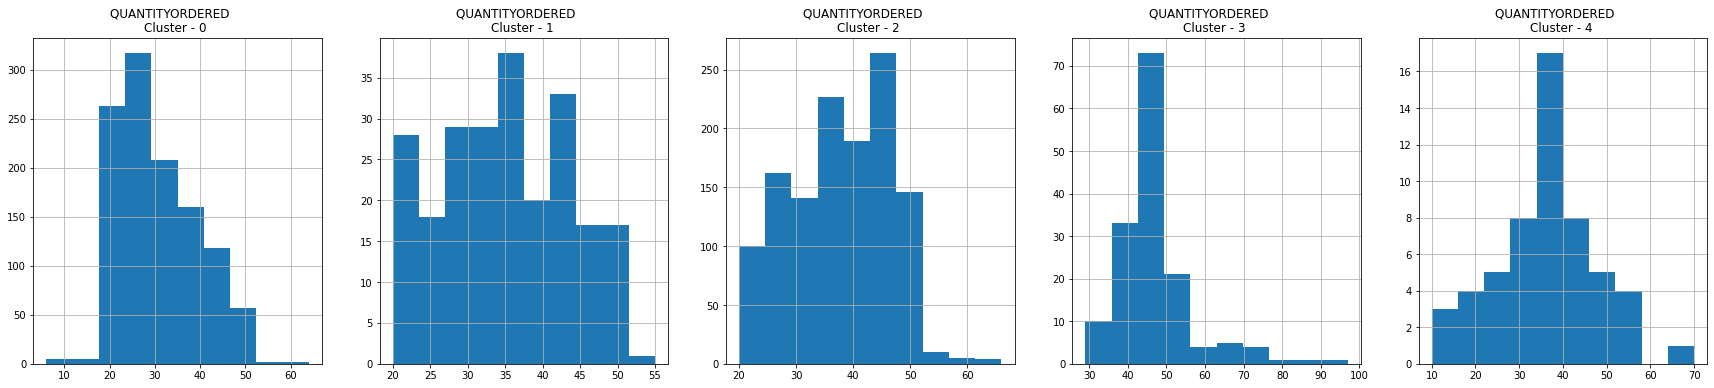

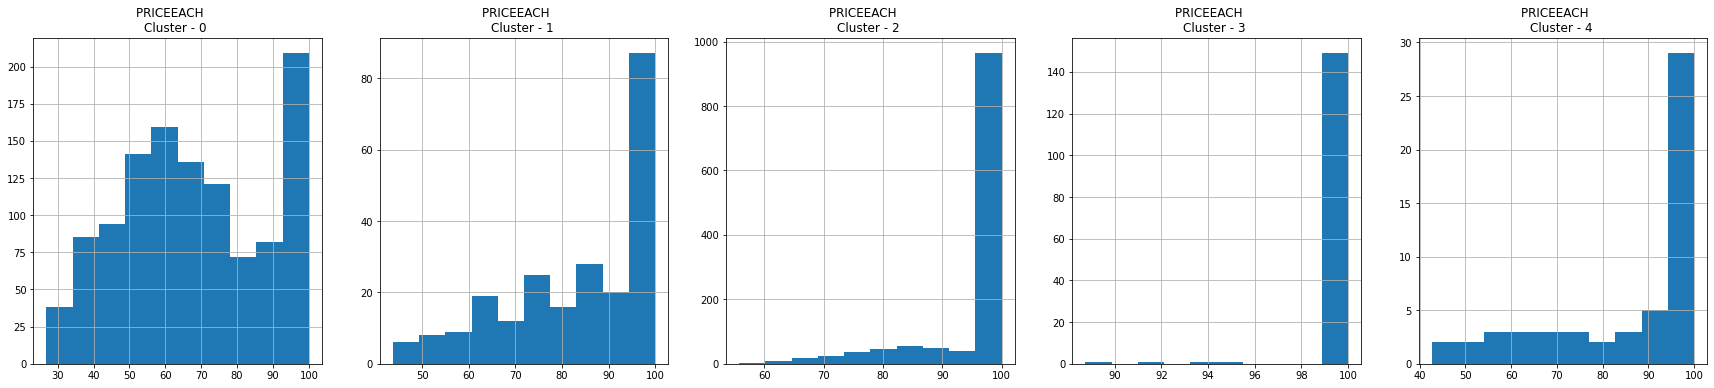

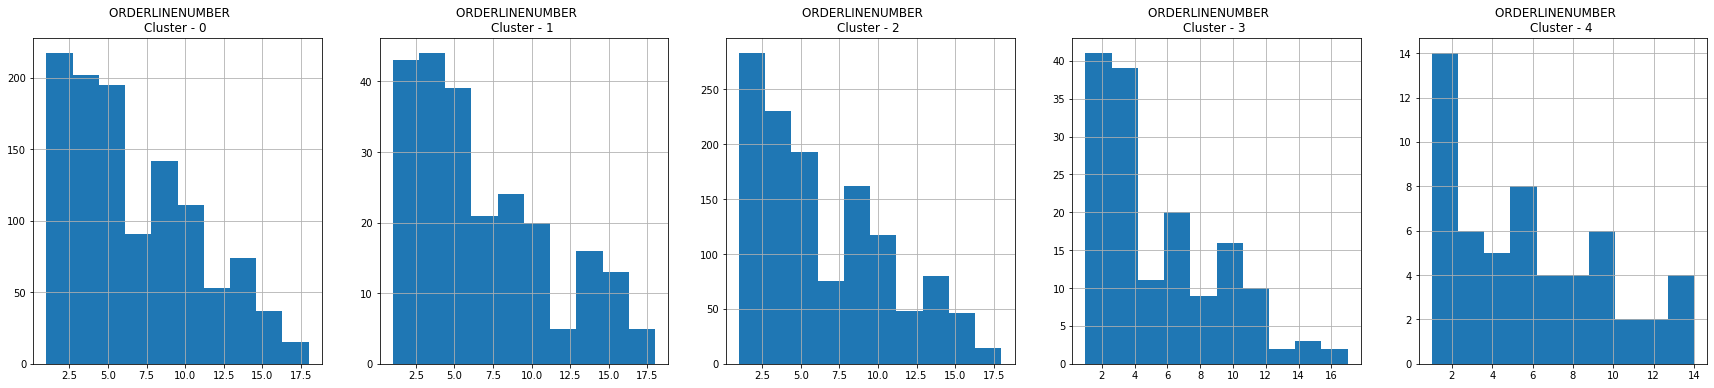

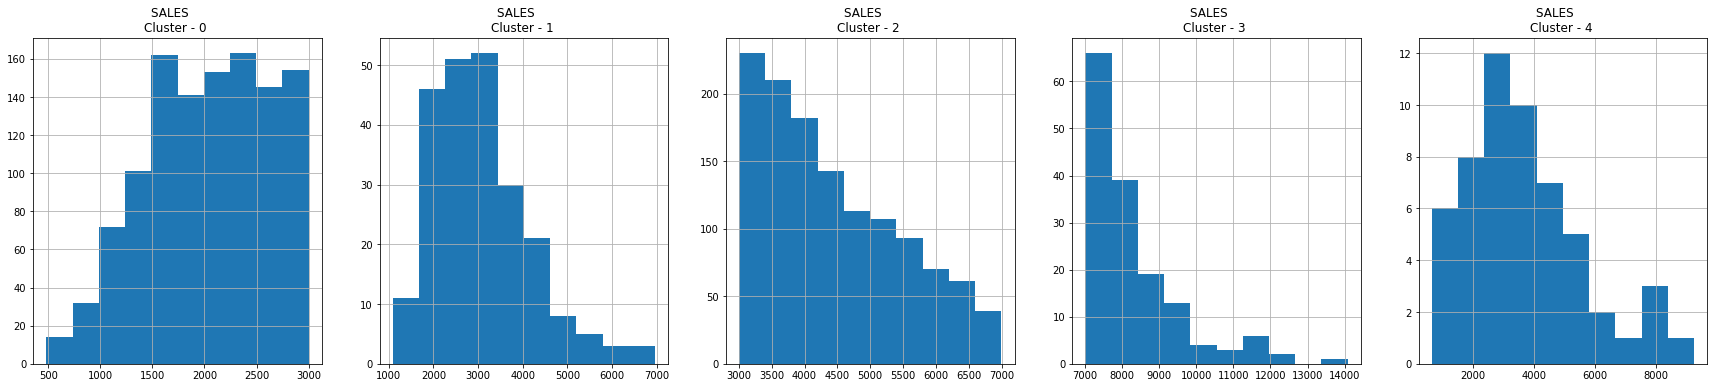

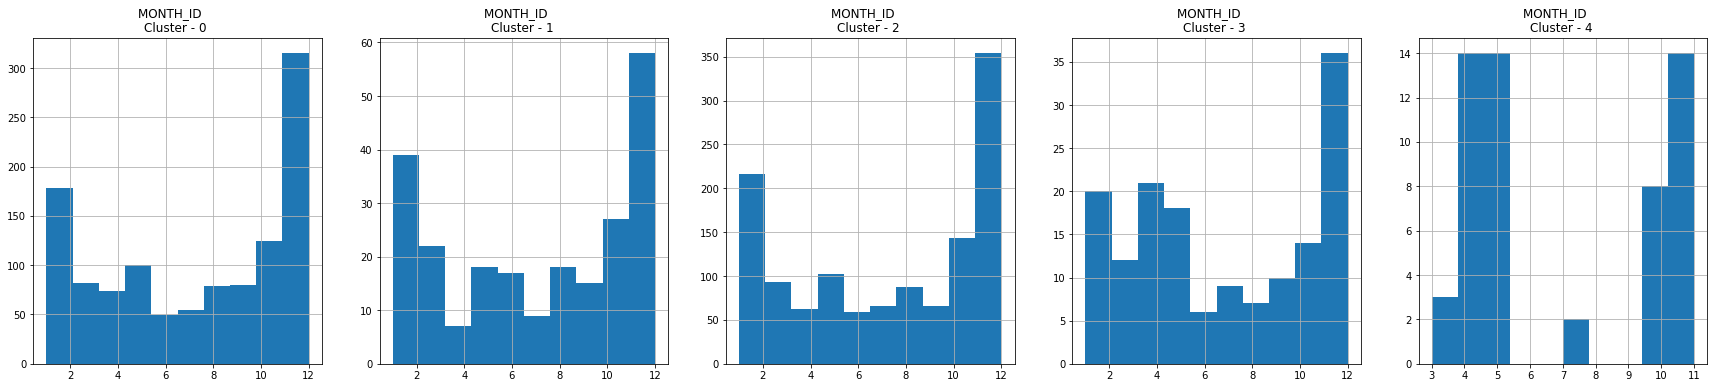

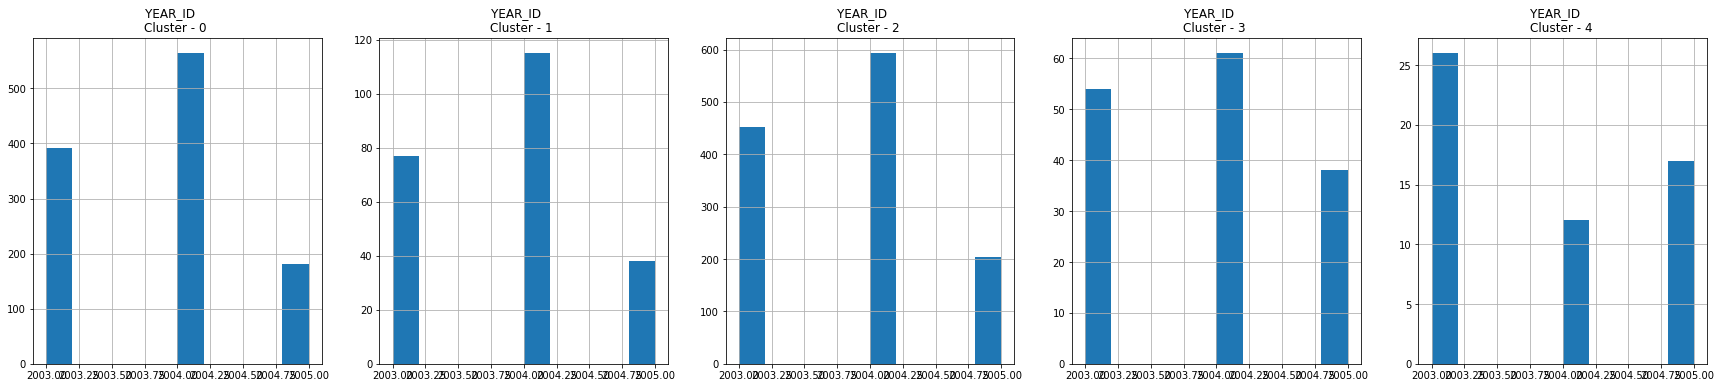

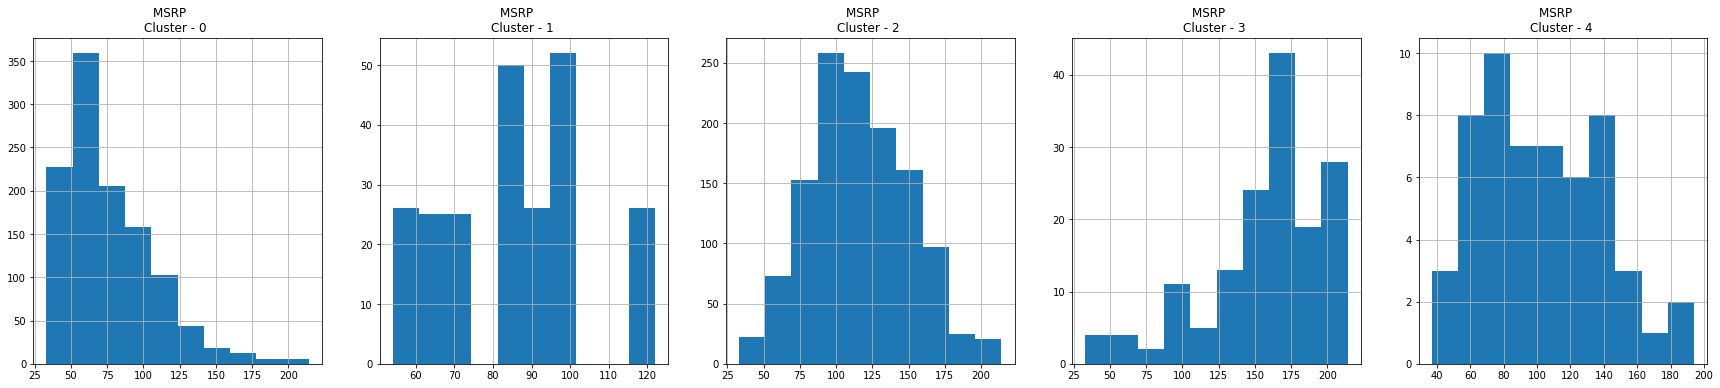

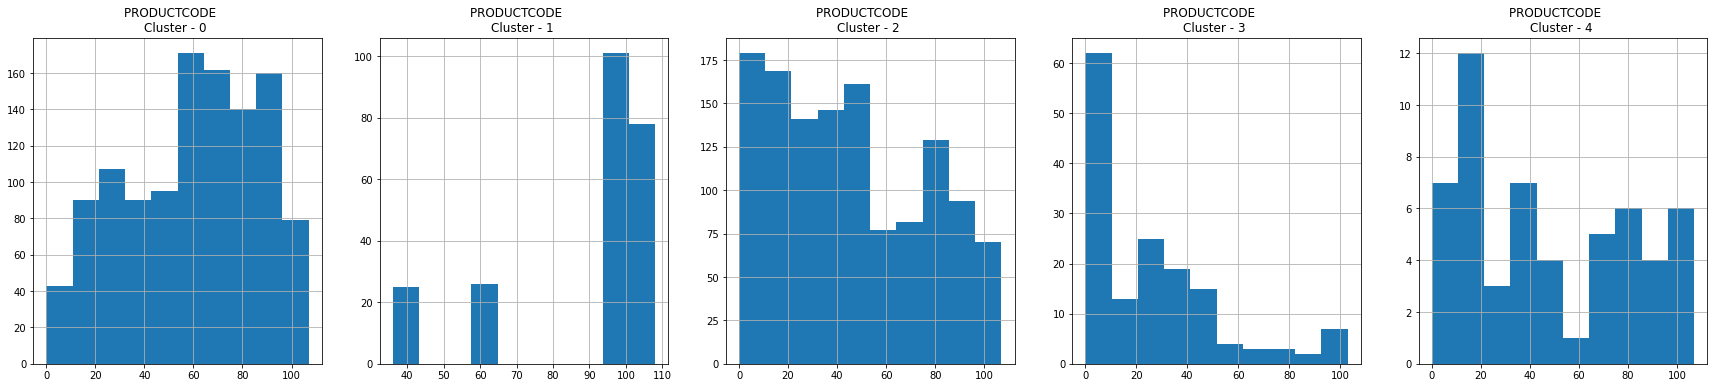

In [56]:
# plotting histogram for each feature based on cluster 
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = sale_df_cluster[sale_df_cluster['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()


1. Cluster 0 (Highest) - This group represents customers who buy items in high quantity centered around ~47, they buy items in all price range leaning towards high price items of ~99. They also correspond to the highest total sales around ~8296 and they are active throughout the year. They are the highest buyers of products with high MSRP ~158.
2. Cluster 1 - This group represents customers who buy items in varying quantity ~35, they tend to buy high price items ~96. Their sales is bit better average ~4435, they buy products with second highest MSRP of ~133.
2. Cluster 2 (lowest) - This group represents customers who buy items in low quantity ~30. They tend to buy low price items ~68. Their sales ~2044 is lower than other clusters and they are extremely active around holiday season. They buy products with low MSRP ~75.
4. Cluster 3 - This group represents customers who are only active during the holidays. they buy in lower quantity ~35, but they tend to buy average price items around ~86. They also correspond to lower total sales around ~3673, they tend to buy items with MSRP around 102.
5. Cluster 4 - This group represents customers who buy items in varying quantity ~39, they tend to buy average price items ~94. Their sales ~4280.

In [57]:
# Reduce the original data to 3 dimensions using PCA for visualizig the clusters using sklearn

pca=PCA(n_components=3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.48627842, -1.19615628,  1.00015964],
       [-0.78476633, -1.03414978,  1.45632614],
       [ 1.43136351,  0.1208351 ,  0.33420547],
       ...,
       [ 0.38990636,  4.11709939, -0.14824683],
       [-2.78901067,  2.36317526,  1.53446345],
       [-0.70548103,  3.29638849, -0.5493985 ]])

In [58]:
#creating a dataframe of all the three principle component with names pc1, pc2, pc3
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca2'])
pca_df.head()

,pca1,pca2,pca2
0,-0.486278,-1.196156,1.000160
1,-0.784766,-1.034150,1.456326
2,1.431364,0.120835,0.334205
3,1.288477,-0.214001,-0.555477
4,1.976053,-0.134274,-1.026264


In [59]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df

,pca1,pca2,pca2,cluster
0,-0.486278,-1.196156,1.000160,0
1,-0.784766,-1.034150,1.456326,0
2,1.431364,0.120835,0.334205,2
3,1.288477,-0.214001,-0.555477,2
4,1.976053,-0.134274,-1.026264,2
...,...,...,...,...
2818,-2.450286,1.106552,-1.604890,1
2819,-0.158033,3.696067,0.571490,1
2820,0.389906,4.117099,-0.148247,1
2821,-2.789011,2.363175,1.534463,1


In [62]:
 # Visualize clusters using 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3', color = 'cluster', symbol = 'cluster', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

ValueError: ignored